In [2]:
"""Gear shifts on track
=======================

Plot which gear is being used at which point of the track
"""
##############################################################################
# Import FastF1 and load the data

import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colormaps
from matplotlib.collections import LineCollection
import fastf1

core           INFO 	Loading data for Italian Grand Prix - Race [v3.4.5]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '11', '55', '16', '63', '44', '23', '4', '14', '77', '40', '81', '2', '24', '10', '18', '27', '20', '31', '22']


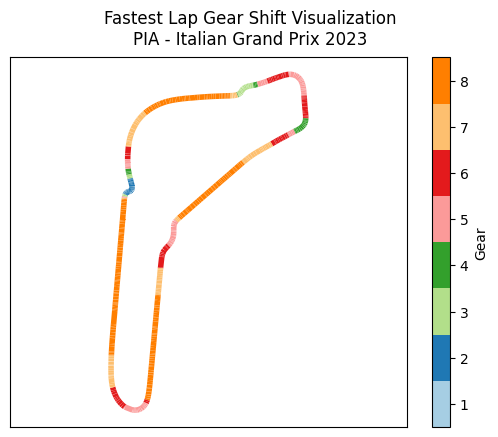

In [4]:

session = fastf1.get_session(2023, 'Monza', 'R')
session.load()

lap = session.laps.pick_fastest()
tel = lap.get_telemetry()
# sphinx_gallery_defer_figures

##############################################################################
# Prepare the data for plotting by converting it to the appropriate numpy
# data types

x = np.array(tel['X'].values)
y = np.array(tel['Y'].values)

points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)
gear = tel['nGear'].to_numpy().astype(float)
# sphinx_gallery_defer_figures

##############################################################################
# Create a line collection. Set a segmented colormap and normalize the plot
# to full integer values of the colormap

cmap = colormaps['Paired']
lc_comp = LineCollection(segments, norm=plt.Normalize(1, cmap.N+1), cmap=cmap)
lc_comp.set_array(gear)
lc_comp.set_linewidth(4)
# sphinx_gallery_defer_figures

##############################################################################
# Create the plot

plt.gca().add_collection(lc_comp)
plt.axis('equal')
plt.tick_params(labelleft=False, left=False, labelbottom=False, bottom=False)

title = plt.suptitle(
    f"Fastest Lap Gear Shift Visualization\n"
    f"{lap['Driver']} - {session.event['EventName']} {session.event.year}"
)
# sphinx_gallery_defer_figures


##############################################################################
# Add a colorbar to the plot. Shift the colorbar ticks by +0.5 so that they
# are centered for each color segment.

cbar = plt.colorbar(mappable=lc_comp, label="Gear",
                    boundaries=np.arange(1, 10))
cbar.set_ticks(np.arange(1.5, 9.5))
cbar.set_ticklabels(np.arange(1, 9))


plt.show()